# **EDA on Haberman Dataset**







## **Introduction**:
The Haberman dataset contains a list of cases based on the survivality of patients who underwent surgery for breast cancer. The study was conducted at University of Chicago's Billing Hospital between 1958 and 1970.

## **Objective**:
To study and perform various analysis on Haberman Cancer Dataset to find relevant and useful feature or combination of features based on their survival after 5 years of operation.


## **Attribute Information:**


Age of patients at the time of operation. (Numerical)\
Year in which they underwent operation. (Numerical) \
Numer of positive axiallary nodes detected. (Numerical) \
Survival status (class attribute):\
1 = the patient survived 5 years or longer \
2 = the patient died within 5 years


## **Importing relevant libraries and procuring the file:**

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import files
dataset = files.upload()

In [3]:
hbm = pd.read_csv('haberman.csv')


## **Understanding the data:**

In [4]:
hbm.shape  #Shows the number of rows and columns present.

(306, 4)

In [5]:
hbm.columns #Shows the various columns present.

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
hbm.info() #brief info about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


### **Observations:**

1.   The 'non-null' in the above snippet represents that there are no missing values in the dataset.
2.   All the values are of integer type.
3.   For the purpose of readibility, we shall map the values 1 & 2 in the status column as 'Survived' meaning that the patient survived for 5 years and longer or 'Dead' if the patient died within 5 years post-operation.

In [7]:
hbm['status'] = hbm['status'].map({1:'Survived',2:'Died'})

hbm.head() #Shows the first five instances of the data.


,age,year,nodes,status
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived


In [8]:
hbm.tail() #Shows the bottom five instances of the data.

,age,year,nodes,status
301,75,62,1,Survived
302,76,67,0,Survived
303,77,65,3,Survived
304,78,65,1,Died
305,83,58,2,Died


In [9]:
hbm.describe() #describe the dataset.

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


### **Observation:**

1.   Count shows the total number of values in the respective column.
2.   Mean shows the mean of all the values in the respective column.
3. std represents the standard deviation of the values in the respective column.
4. Min shows the the minimum of all the values in the respective column.
5. 25%, 50% & 75% shows the respective percentile values.
6. Max shows the maximum of all the values in the respective column.



In [10]:
hbm['status'].value_counts()  #Shows value count of each of the status type.

Survived    225
Died         81
Name: status, dtype: int64

### **Observations:**


1.   This shows that 225 patients survived and 81 patients died after 5 years post-operation.
2.   The data is imbalanced.



# **Univariate Analysis:**
This process involves describing and analysing the data using a single feature.



## **PDF(Probability Density Function):**

The height of the bar represents the percentage of data points under the respective group.

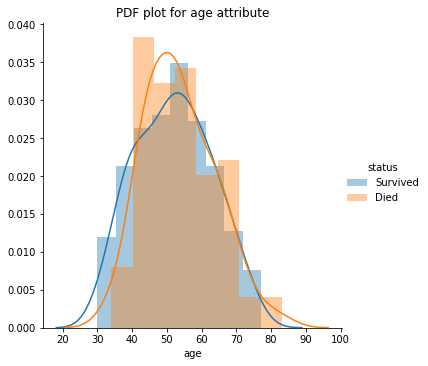

In [11]:
sns.FacetGrid(hbm,hue='status', height = 5).map(sns.distplot,'age') .add_legend();  #plots the percentage of survivors with respect to age.
plt.title('PDF plot for age attribute')
plt.show() 


## Observations:


1.   The overlapping indicates that the plot is inconclusive for finding the survivality of a person based on their age.
2.   However, it can be inferred that patients belonging to the age group of 30-40 had a higher chance of survival, while the rest of the age groups showed mixed results.



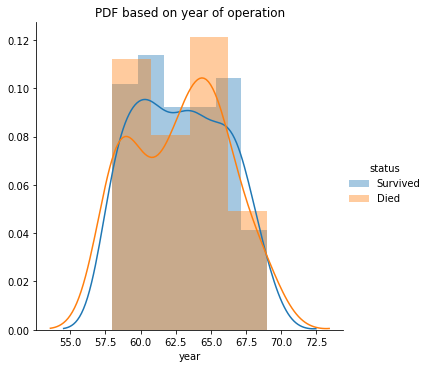

In [12]:
sns.FacetGrid(hbm,hue='status', height = 5).map(sns.distplot,'year') .add_legend();  #plots the percentage of survivors with respect to year of operation.
plt.title('PDF based on year of operation')
plt.show() 

## Observations:


1.   The patients who underwent the operation during 1960-1965 had a higher survival rate. 
2.   However,as this plot represents the survival chances based on **year of operation**, it doesn't hold much signifance for the analysis.



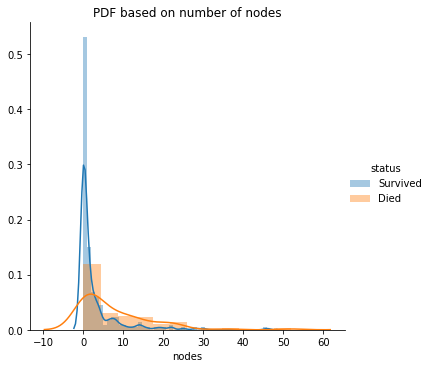

In [13]:
sns.FacetGrid(hbm,hue='status', height = 5)\
.map(sns.distplot,'nodes')\
.add_legend();  #plots the percentage of survivors with respect to number of positive auxillary nodes present.
plt.title('PDF based on number of nodes')
plt.show() 

## Observations:


1.   This plot shows the survivality percentage based on number of positive auxiallary nodes found.
2.   Conclusively, it can be inferred that patients with no nodes or 1 node had a much higher chance of surviving. 



## **CDF(Cumulative Distribution Function)**


This refers to probability that a random variable is less than or equal to a specified value.

In [14]:
status_survived = hbm[hbm['status']=='Survived']      #storing the instances where status is 'survived' i.e the patient survived.
status_died =  hbm[hbm['status']=='Died']             #storing the instances where status is 'died' i.e the patient died.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
***********************************************************
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


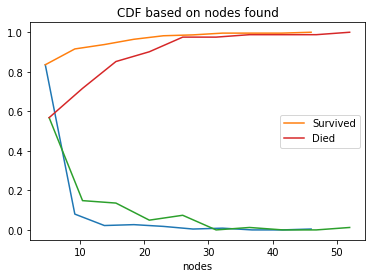

In [15]:

counts1, bin_edges1 = np.histogram(status_survived['nodes'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)                        #plotting PDF of survived patients.
plt.plot(bin_edges1[1:], cdf1, label = 'Survived')    #plotting CDF of survived patients.
plt.xlabel('nodes')


print("***********************************************************")


counts2, bin_edges2 = np.histogram(status_died['nodes'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)                      #plotting PDF of patients who died.
plt.plot(bin_edges2[1:], cdf2, label = 'Died')      #plotting CDF of patients who died.
plt.xlabel('nodes')
plt.legend() 
plt.title('CDF based on nodes found')
plt.show()


### Observations:

Nearly 80% of the patients with nodes less than 5 survived.



## **Box plots & Violin plots**

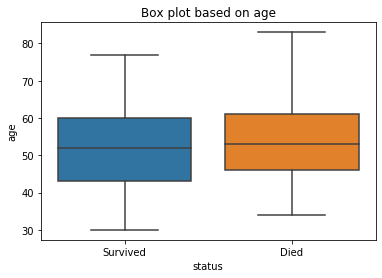

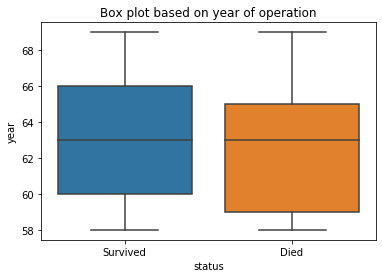

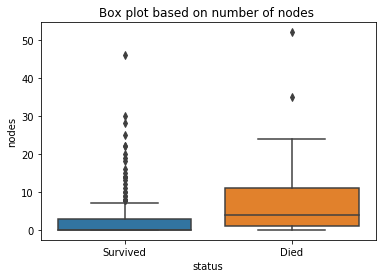

In [19]:
sns.boxplot(x = 'status', y= 'age', data = hbm)    #box plot for age vs. status
plt.title('Box plot based on age')
plt.show()


sns.boxplot(x = 'status', y= 'year', data = hbm)   #box plot for year of operation vs. status
plt.title('Box plot based on year of operation')
plt.show()


sns.boxplot(x = 'status', y= 'nodes', data = hbm)  #box plot for number of nodes vs. status
plt.title('Box plot based on number of nodes ')
plt.show()

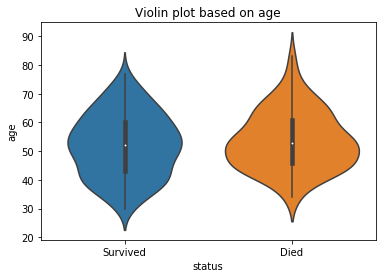

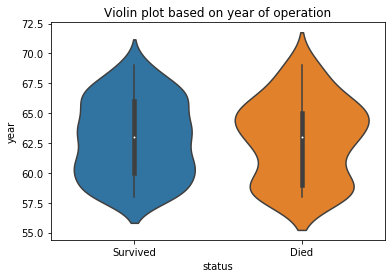

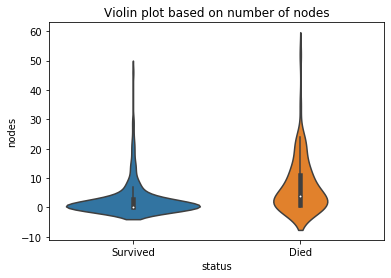

In [18]:
sns.violinplot(x = 'status', y= 'age', data = hbm)     #violin plot for age vs. status
plt.title('Violin plot based on age')
plt.show()


sns.violinplot(x = 'status', y= 'year', data = hbm)   #violin plot for year of operation vs. status
plt.title('Violin plot based on year of operation')
plt.show()


sns.violinplot(x = 'status', y= 'nodes', data = hbm)  #violin plot for number of nodes vs. status
plt.title('Violin plot based on number of nodes')
plt.show()

### Observations:


1.   Patients in the age group of 45-55 had a lesser chance of surviving.
2.   Patients who underwent the operation around the year 1965 had a lesser chance of surviving whereas those who underwent the operation during 1960-65 showed higher success.
3. Patients with nodes less than 1 showed distinctively high survival rates. And the number of survivors dramatically decreased as the number of nodes started increasing.


# **Bivariate Analysis:**
Analysis based on two features visualised on a 2D plot.

## Pairplots:
Shows all possible plots that can be formed by the given attributes in a 2D plot.

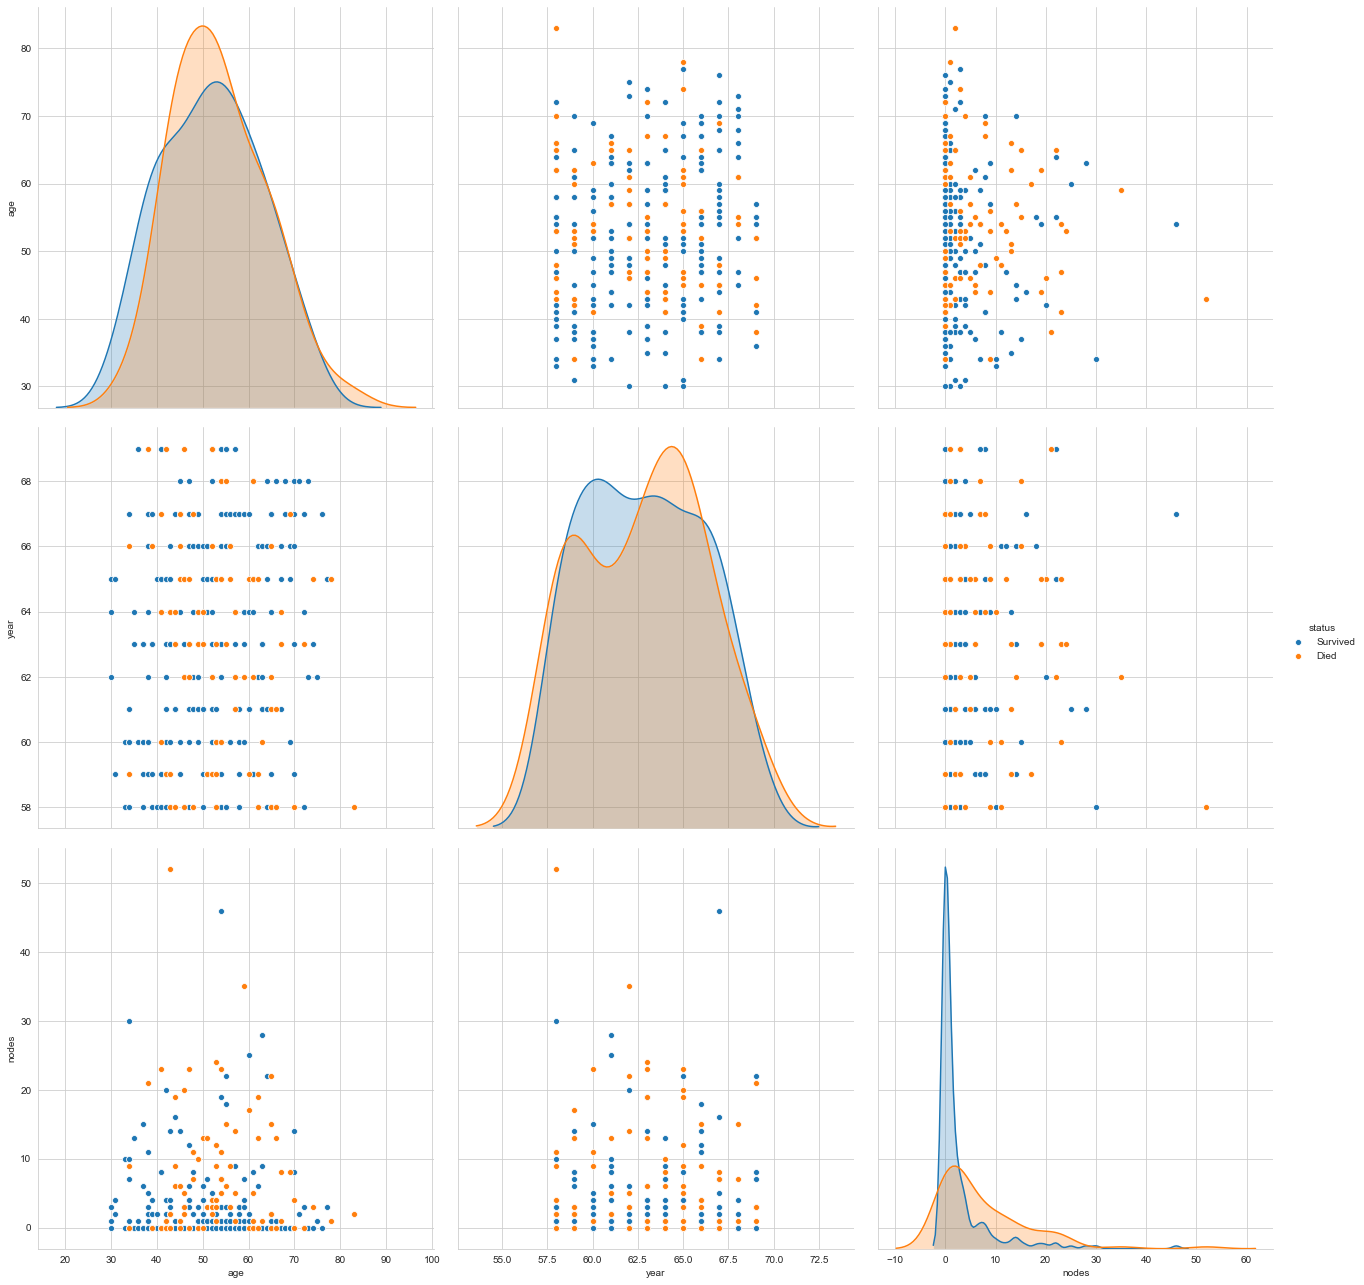

In [20]:
sns.set_style('whitegrid')
sns.pairplot(hbm, hue='status', height = 6)
plt.show()

### Observations:

The plot between age and nodes was more comprehensive and hence comparatively more reliable.

## Scatter plot:
Plots the values obtained between two attributes.
(Here we have taken only the plot between age and number of nodes because of it's better comprehensibility and ease of understanding.)

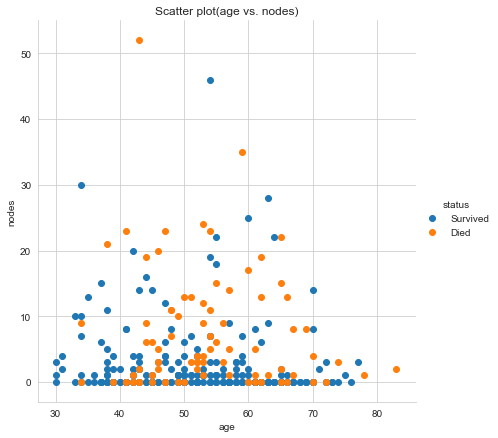

In [21]:
sns.set_style('whitegrid')
sns.FacetGrid(hbm, hue = 'status' , height = 6)\
 .map(plt.scatter,'age','nodes')\
 .add_legend()
plt.title('Scatter plot(age vs. nodes)')
plt.show()

### Observation:


1.   Patients having no nodes showed better survivality.
2.   Patients above the age of 50 and having more than 10 nodes were less likely to survive.



# **Conclusions:**
1. The dataset was imbalanced and skewed towards survived patients whereas there was less data on the patients who died. 225 patients survived and 81 patients died after 5 years post-operation.
2. Analysis based on age and year of operation of patients didn't give conclusive results and hence were ambiguous. Furthermore, year of operation,as such, doesn't hold much signifance for determining survivality of a patient.
3. The data derived from studying number of positive auxillary nodes was fairly consistent and comprehensive. Patients having 1 or less number of nodes showed distinctive survival rate.
4. The chances of surviving was inversely related to the number of nodes found and patients who were older than 50 years of age and had 10 or more nodes were likely to die within 5 years of operation.